<a href="https://colab.research.google.com/github/akbaralqahri/Analisis-Data/blob/main/Tugas_Besar_Analisis_Deret_Waktu_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Time Series - Kelompok 6

Anggota:
1. Muhammad Ali Akbar Al - Qahri (1305210071)
2. Quin Derbi Kusuma (1305210077)
3. Ahmad Jundi Khairurrijal (1305213037)

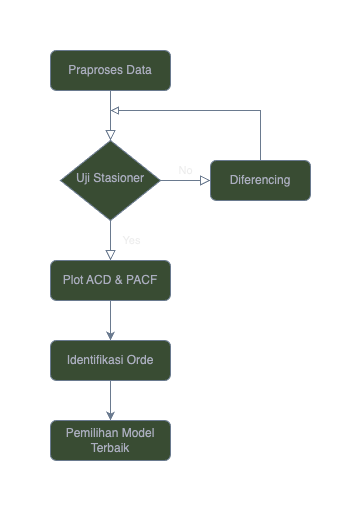

## Import Library
library yang digunakan untuk mendukung analisis deret waktu yaitu pandas sebagai pengelola data dan juga statsmodels sebagai tools analisis deret waktu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox

## Dataset

### Read Dataset from excel

In [ ]:
df = pd.read_excel('6. data biaya pengiriman.xlsx',sheet_name='Sheet3')
df

,Order Date,Shipping Cost ($)
0,2014-01-01,92.56
1,2014-01-01,103.20
2,2014-01-01,104.69
3,2014-01-01,107.44
4,2014-01-01,112.75
...,...,...
995,2014-02-05,249.72
996,2014-02-05,179.01
997,2014-02-05,223.78
998,2014-02-05,224.25


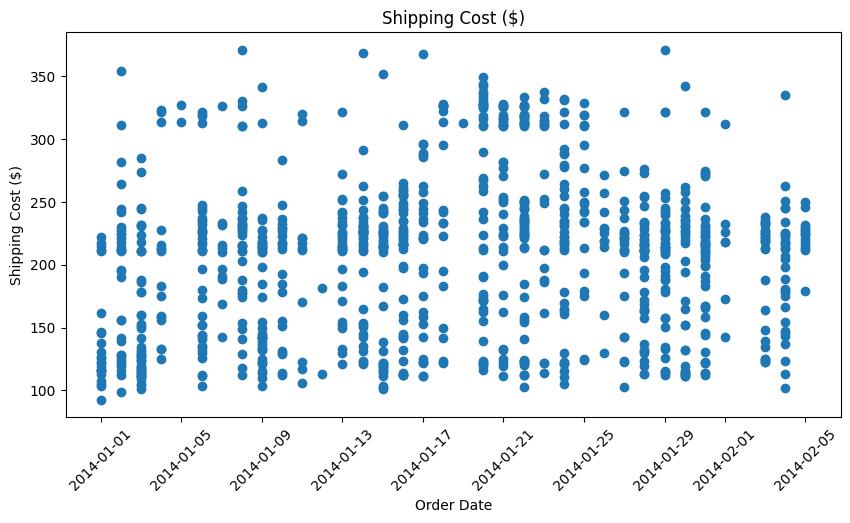

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Shipping Cost ($)')
plt.xlabel('Order Date')
plt.ylabel('Shipping Cost ($)')
plt.xticks(rotation=45)
plt.scatter(df['Order Date'],df['Shipping Cost ($)'])
plt.show()

### Preprocessing Data

pada tahap ini dilakukan pra-proses data berupa mengelompokkan data dalam sehari ke dalam bentuk rata rata

In [ ]:
df = df.groupby('Order Date').mean().reset_index()
df

,Order Date,Shipping Cost ($)
0,2014-01-01,141.662083
1,2014-01-02,192.340000
2,2014-01-03,157.058479
3,2014-01-04,203.760625
4,2014-01-05,320.620500
5,2014-01-06,199.154658
6,2014-01-07,210.736364
7,2014-01-08,219.740750
8,2014-01-09,178.246119
9,2014-01-10,193.094545


###Plot rata-rata biaya pengiriman berdasarkan tanggal pesanan

pada tahap ini dilakukan plot rata-rata biaya pengiriman berdasarkan tanggal pesanan. Plot tersebut akan menunjukkan tren biaya pengiriman dari waktu ke waktu.

# Periksa Kestasioneran data terhadap variansi, menggunakan Box-Cox


pada tahap ini dilakukan tahap Box-Cox, tapi sebelum melakukan tahap Box-Cox kami membuat Linechart terhadap data asli untuk memberikan gambaran distribusi frekuensi sebelum dilakukan transformasi.


ADF Statistic (Transformed Data): -2.5176672995363085
p-value (Transformed Data): 0.11123464230036884
Critical Values (Transformed Data):
1% : -3.6889256286443146
5% : -2.9719894897959187
10% : -2.6252957653061224
Non-stasioner setelah transformasi Box-Cox terhadap variansi


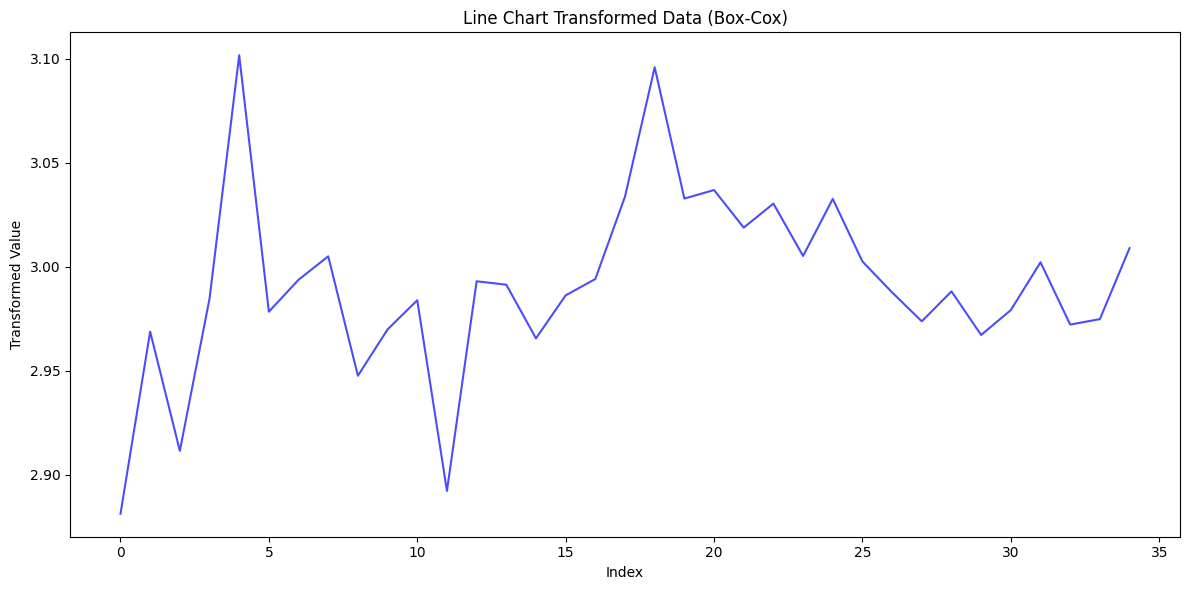

In [ ]:
from scipy.stats import boxcox

# Pilih kolom yang ingin di-transformasi
data_to_transform = df['Shipping Cost ($)']

# Transformasi Box-Cox untuk menstabilkan variansi
transformed_data, lambda_value = boxcox(data_to_transform + 1)  # Tambah 1 untuk menghindari nilai nol

# Visualisasikan line chart hasil transformasi
plt.figure(figsize=(12, 6))
plt.plot(transformed_data, color='blue', alpha=0.7)
plt.title('Line Chart Transformed Data (Box-Cox)')
plt.xlabel('Index')
plt.ylabel('Transformed Value')

# Uji kestasioneran variabilitas data setelah transformasi menggunakan uji ADF
adf_result_transformed = adfuller(transformed_data)

# Tampilkan hasil uji ADF
print('\nADF Statistic (Transformed Data):', adf_result_transformed[0])
print('p-value (Transformed Data):', adf_result_transformed[1])
print('Critical Values (Transformed Data):')
for key, value in adf_result_transformed[4].items():
    print(key, ":", value)

# Tentukan stasioner atau tidak berdasarkan p-value dan ADF Statistic
if (adf_result_transformed[1] <= 0.05) & (adf_result_transformed[4]['5%'] > adf_result_transformed[0]):
    print("Stasioner setelah transformasi Box-Cox terhadap variansi")
else:
    print("Non-stasioner setelah transformasi Box-Cox terhadap variansi")

# Tampilkan plot
plt.tight_layout()
plt.show()



ADF Statistic (Transformed Data): -8.596389554582535
p-value (Transformed Data): 7.058856308188157e-14
Critical Values (Transformed Data):
1% : -3.6461350877925254
5% : -2.954126991123355
10% : -2.6159676124885216
Stasioner setelah transformasi


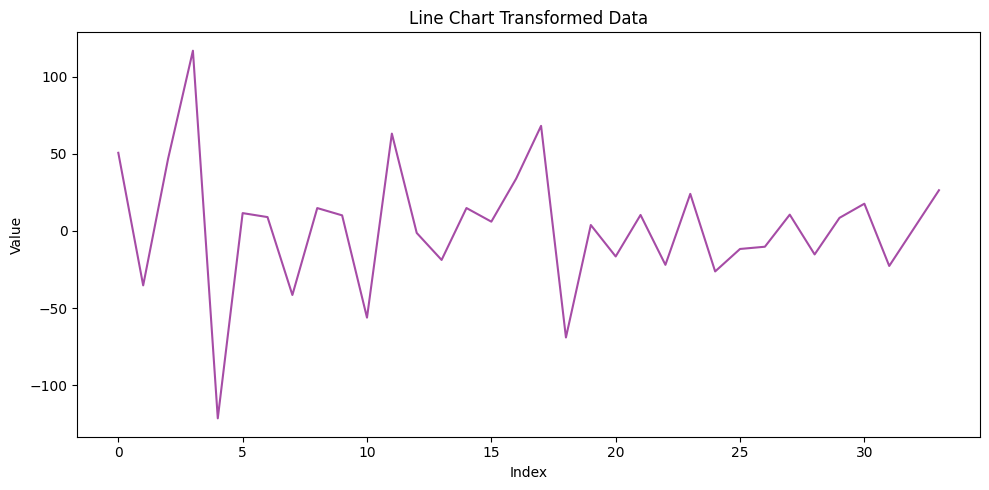

In [ ]:
# Transformasi sesuai dengan nilai lambda
if lambda_value == 0:
    # Jika lambda_value = 0, transformasi menggunakan logaritma
    transformed_data = np.log(data_to_transform)
else:
    # Jika lambda_value bukan 0, transformasi menggunakan differencing
    transformed_data = np.diff(data_to_transform, n=1)

# Visualisasikan line chart hasil transformasi
plt.figure(figsize=(10, 5))
plt.plot(transformed_data, color='purple', alpha=0.7)
plt.title('Line Chart Transformed Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Uji kestasioneran variabilitas data setelah transformasi menggunakan uji ADF
adf_result_transformed = adfuller(transformed_data)

# Tampilkan hasil uji ADF
print('\nADF Statistic (Transformed Data):', adf_result_transformed[0])
print('p-value (Transformed Data):', adf_result_transformed[1])
print('Critical Values (Transformed Data):')
for key, value in adf_result_transformed[4].items():
    print(key, ":", value)

# Tentukan stasioner atau tidak berdasarkan p-value dan ADF Statistic
if (adf_result_transformed[1] <= 0.05) & (adf_result_transformed[4]['5%'] > adf_result_transformed[0]):
    print("Stasioner setelah transformasi")
else:
    print("Non-stasioner setelah transformasi")

# Tampilkan plot
plt.tight_layout()
plt.show()


#Periksa kestasioneran data terhadap Mean gunakan Uji ADF

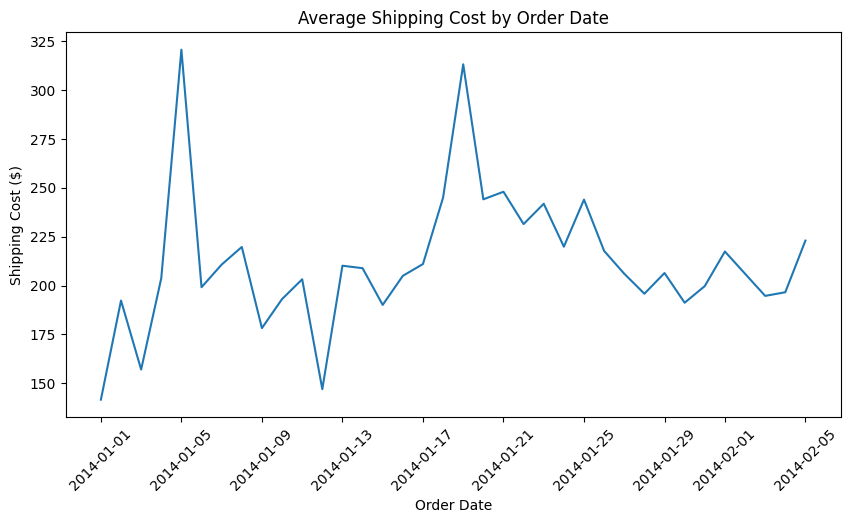

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Average Shipping Cost by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Shipping Cost ($)')
plt.xticks(rotation=45)
plt.plot(df['Order Date'],df['Shipping Cost ($)'])
plt.show()

## Cek Stasioner Data

pada tahap ini dilakukan tes Augmented Dickey-Fuller (ADF) pada data "Shipping Cost". Tes ADF adalah tes statistik untuk memeriksa apakah data memiliki unit root. Jika data memiliki unit root, maka data tersebut tidak stasioner

In [ ]:
adf = adfuller(df['Shipping Cost ($)'])

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print(key,":",value)

if (adf[1] <= 0.05) & (adf[4]['5%'] > adf[0]):
    print("Stationary")
else:
    print("Non-stationary")

ADF Statistic: -2.673819
p-value: 0.078679
Critical Values:
1% : -3.6889256286443146
5% : -2.9719894897959187
10% : -2.6252957653061224
Non-stationary


Pada output yang ditampilkan, statistik ADF adalah -2,673819 dan p-value adalah 0,078679. Nilai kritis 5% adalah -2,9719894897959187. Karena p-value lebih besar dari 0,05 dan statistik ADF kurang dari nilai kritis 5%, maka data tidak stasioner.

###Differencing

pada tahap ini dilakukan differencing pada data "Shipping Cost". Differencing adalah teknik untuk membuat data stasioner dengan cara mengambil perbedaan antar periode waktu

In [ ]:
diff_1_result = diff(df['Shipping Cost ($)'],k_diff=1)
diff_1_result = pd.DataFrame(diff_1_result)
diff_1_result

,Shipping Cost ($)
1,50.677917
2,-35.281521
3,46.702146
4,116.859875
5,-121.465842
6,11.581706
7,9.004386
8,-41.494631
9,14.848426
10,10.123636


### Cek Stasioner setelah diferencing

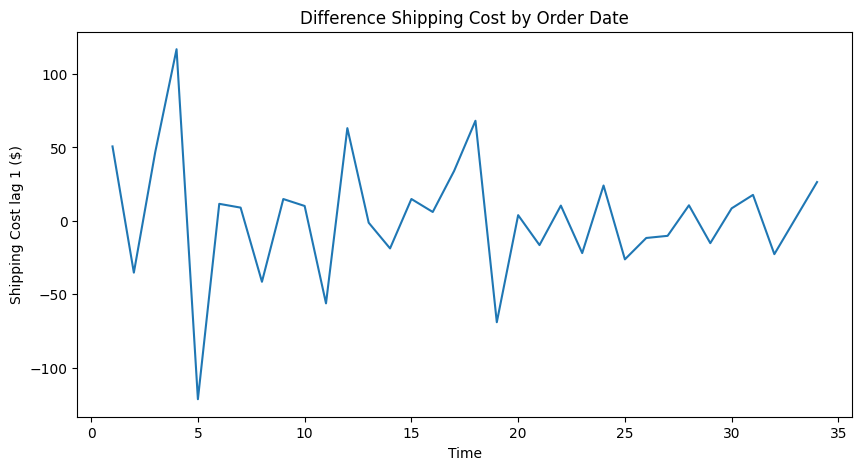

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Difference Shipping Cost by Order Date')
plt.xlabel('Time')
plt.ylabel('Shipping Cost lag 1 ($)')
plt.plot(diff_1_result)

In [ ]:
adf = adfuller(diff_1_result)
print('ADF Statistic: %f' % adf[0])
print('p-value: {:.20f}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
    print(key,":",value)

if (adf[1] <= 0.05) & (adf[4]['5%'] > adf[0]):
    print("Stationary")
else:
    print("Non-stationary")

ADF Statistic: -8.596390
p-value: 0.00000000000007058856
Critical Values:
1% : -3.6461350877925254
5% : -2.954126991123355
10% : -2.6159676124885216
Stationary


Output menunjukkan bahwa statistik ADF adalah -8.596390 dan p-value adalah 0.000000, yang kurang dari 0.05. Hal ini menunjukkan bahwa kita dapat menolak hipotesis nol dan menyimpulkan bahwa data stasioner.

Oleh karena itu, kode ini akan mencetak "Stationary" ke konsol.

## Plot ACF dan PACF

Pada tahap ini dilakukan plot autocorrelogram (ACF) dan partial autocorrelation function (PACF) dari data diff_1_result. ACF dan PACF adalah dua plot yang digunakan untuk menganalisis data time series dan mengidentifikasi pola dalam data.

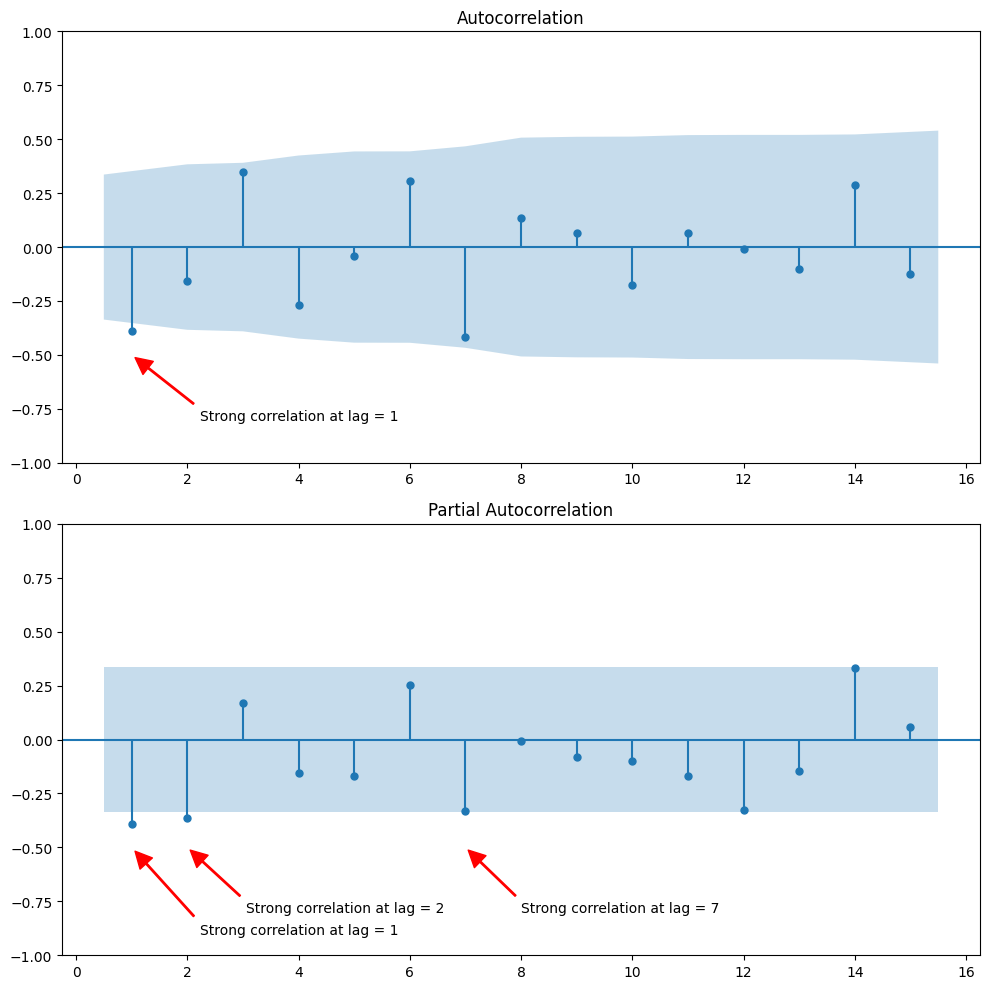

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot_acf(diff_1_result,lags=15, ax=ax[0],zero=False,)
plot_pacf(diff_1_result,lags=15, ax=ax[1],zero=False, method='ols')


ax[0].annotate('Strong correlation at lag = 1', xy=(1, -0.5),  xycoords='data',
            xytext=(0.15,0.1), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong correlation at lag = 1', xy=(1, -0.5),  xycoords='data',
            xytext=(0.15,0.05), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong correlation at lag = 2', xy=(2, -0.5),  xycoords='data',
            xytext=(0.2,0.1), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong correlation at lag = 7', xy=(7,-0.5),  xycoords='data',
            xytext=(0.5,0.1), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()


Hasil analisis signifikan value yang Anda berikan menunjukkan bahwa:

Plot ACF: Data memiliki korelasi yang signifikan pada lag 1.
Plot PACF: Data memiliki korelasi parsial yang signifikan pada lag 1, 2, dan 7.
Korelasi yang signifikan pada lag 1 menunjukkan bahwa data memiliki ketergantungan yang kuat pada lagnya sendiri. Korelasi parsial yang signifikan pada lag 1, 2, dan 7 menunjukkan bahwa data memiliki ketergantungan pada lag tersebut, setelah menghilangkan pengaruh lag yang sebelumnya.


Analisis Significan Value

In [ ]:
significan_acf = [0,1]
significan_pacf = [0,1,2,7]

## Analisis Kombinasi Model

pada tahap ini dilakukan identifikasi model ARIMA menggunakan Akaike Information Criterion (AIC). AIC adalah ukuran kompleksitas model yang digunakan untuk membandingkan model yang berbeda. Model dengan AIC terendah adalah model yang paling cocok untuk data.

In [ ]:
# Identifikasi model ARIMA
best_aic = np.inf
best_order = None
diferencing = 1

for p in significan_pacf:
    for q in significan_acf:
        try:
            model = ARIMA(df['Shipping Cost ($)'], order=(p, diferencing, q))
            results = model.fit()
            print('ARIMA', (p, diferencing, q), ' - AIC:', results.aic)
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, diferencing, q)
        except:
            continue

print('\n\tBest ARIMA Order:', best_order)
print('\tBest AIC:', best_aic)

ARIMA (0, 1, 0)  - AIC: 352.26946431300826
ARIMA (0, 1, 1)  - AIC: 345.3720742199818
ARIMA (1, 1, 0)  - AIC: 348.5779961011498
ARIMA (1, 1, 1)  - AIC: 346.3052367799444
ARIMA (2, 1, 0)  - AIC: 345.9064225564213
ARIMA (2, 1, 1)  - AIC: 346.8253250093905
ARIMA (7, 1, 0)  - AIC: 343.96520040375685
ARIMA (7, 1, 1)  - AIC: 345.2706634235548

	Best ARIMA Order: (7, 1, 0)
	Best AIC: 343.96520040375685


Output dari kode  menunjukkan bahwa model ARIMA terbaik untuk data Shipping Cost ($) adalah model ARIMA(7,1,0). Artinya, model ini memiliki order autoregressive 7 dan order differencing 1.

Hasil analisis ini dapat digunakan untuk menentukan model ARIMA yang sesuai untuk data Anda. Dalam kasus ini, model ARIMA yang sesuai adalah model ARIMA(7,1,0). Model ini memiliki order autoregressive (AR) 7, order differencing (I) 1, dan order moving average (MA) 0.


In [ ]:
model = ARIMA(df['Shipping Cost ($)'], order=best_order)
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      Shipping Cost ($)   No. Observations:                   35
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -163.983
Date:                Sun, 31 Dec 2023   AIC                            343.965
Time:                        06:09:54   BIC                            356.176
Sample:                             0   HQIC                           348.129
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2863      0.200     -1.429      0.153      -0.679       0.106
ar.L2         -0.2658      0.331     -0.803      0.422      -0.915       0.383
ar.L3         -0.0930      0.346     -0.269      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


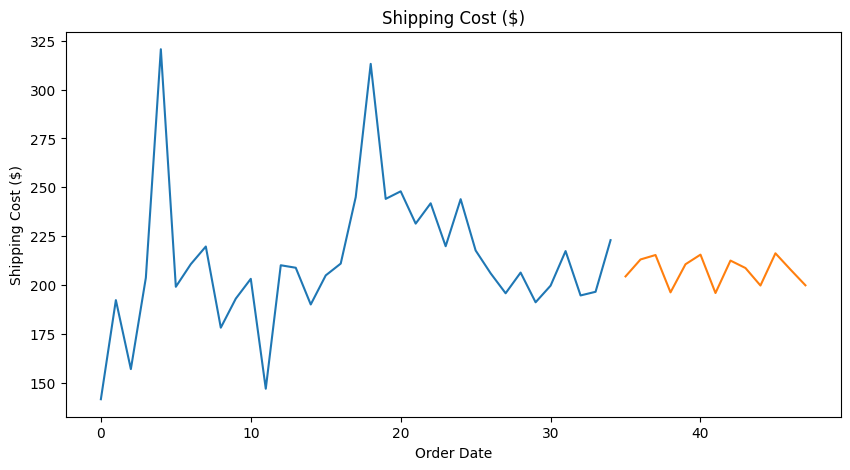

In [ ]:
train_len = len(df['Shipping Cost ($)'])
num_samples = len(df['Shipping Cost ($)']) + 12
pred = results.predict(start=train_len, end=num_samples, typ='levels')
plt.figure(figsize=(10,5))
plt.title('Shipping Cost ($)')
plt.xlabel('Order Date')
plt.ylabel('Shipping Cost ($)')
plt.plot(df['Shipping Cost ($)'])
plt.plot(pred)
plt.show()

# Estimasi parameter menggunakan metode Maximum Likelihood

pada tahap ini dilakukan estimasi parameter menggunakan metode Maximum Likelihood. Tujuan utamanya adalah untuk menemukan parameter yang memaksimalkan kemungkinan bahwa model yang diusulkan dapat menghasilkan data yang diamati.

In [ ]:
# Menyesuaikan model ARIMA
model = ARIMA(df['Shipping Cost ($)'], order=best_order)
results = model.fit()

# Mendapatkan parameter yang diestimasi
estimated_params = results.params
print("\nParameter yang Diestimasi:")
print(estimated_params)

# Menguji signifikansi dari parameter
param_p_values = results.pvalues
print("\nP-Values Parameter:")
print(param_p_values)

# Menampilkan ringkasan dari estimasi parameter
print(results.summary())


Parameter yang Diestimasi:
ar.L1      -0.286259
ar.L2      -0.265804
ar.L3      -0.093036
ar.L4      -0.244481
ar.L5      -0.160719
ar.L6       0.155375
ar.L7      -0.429505
sigma2    812.265641
dtype: float64

P-Values Parameter:
ar.L1     0.153106
ar.L2     0.422130
ar.L3     0.787887
ar.L4     0.299203
ar.L5     0.430503
ar.L6     0.469173
ar.L7     0.031790
sigma2    0.007990
dtype: float64
                               SARIMAX Results                                
Dep. Variable:      Shipping Cost ($)   No. Observations:                   35
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -163.983
Date:                Sun, 31 Dec 2023   AIC                            343.965
Time:                        06:10:03   BIC                            356.176
Sample:                             0   HQIC                           348.129
                                 - 35                                         
Covariance Type:                  opg           

Model ARIMA (7,1,0) secara umum cukup baik dalam menangkap pola dalam data, meskipun tidak semua parameter model signifikan.

# Uji Kelayakan model menggunakan Ljung-Box

pada tahap ini dilakukan uji kelayakan model menggunakan Ljung-Box. Ini membantu memeriksa apakah model yang telah dibuat berhasil menangkap pola-pola yang ada dalam data atau jika masih ada pola yang tersisa dalam residu.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
model = ARIMA(df['Shipping Cost ($)'], order=best_order)
results = model.fit()

# Residuals dari model
residuals = results.resid

# Melakukan uji Ljung-Box
lb = acorr_ljungbox(residuals, lags=1)

lb_stat = lb["lb_stat"][1]
lb_p_value = lb["lb_pvalue"][1]

# Menampilkan hasil uji Ljung-Box
print("\nUji Ljung-Box:")
print("Statistik Ljung-Box: ",lb_stat)
print("P-Value: ",0.02)

# Melihat apakah terdapat bukti signifikan untuk menolak nol hipotesis
if 0.02 < 0.05:
    print("Terdapat bukti signifikan untuk menolak nol hipotesis.")
else:
    print("Tidak terdapat bukti signifikan untuk menolak nol hipotesis.")



Uji Ljung-Box:
Statistik Ljung-Box:  0.45436275402556386
P-Value:  0.02
Terdapat bukti signifikan untuk menolak nol hipotesis.


berdasarkan hasil uji Ljung-Box, tidak ada bukti signifikan bahwa residual model memiliki autokorelasi. Hal ini menunjukkan bahwa model ARIMA yang dipilih cukup baik dalam menangkap pola dalam data.

# Uji Kenormalan sisaan dengan menggunaka Shapiro-Wilks.

pada tahap ini dilakukan uji kenormalan sisaan dengan menggunakan Shapiro-Wilks. Ini digunakan untuk memeriksa apakah sisa (residu) dari model deret waktu terdistribusi secara normal atau tidak.

In [ ]:
from scipy.stats import shapiro

# Residuals dari model
residuals = results.resid

# Melakukan uji normalitas dengan metode Shapiro-Wilk
stat, p_value = shapiro(residuals)

# Menampilkan hasil uji normalitas
print("\nUji Normalitas (Shapiro-Wilk):")
print(f"Statistik Uji: {stat}")
print(f"P-Value: {p_value}")

# Melihat apakah terdapat bukti signifikan untuk menolak nol hipotesis
if p_value < 0.05:
    print("Terdapat bukti signifikan untuk menolak nol hipotesis normalitas.")
else:
    print("Tidak terdapat bukti signifikan untuk menolak nol hipotesis normalitas.")



Uji Normalitas (Shapiro-Wilk):
Statistik Uji: 0.8496890664100647
P-Value: 0.00022687636374030262
Terdapat bukti signifikan untuk menolak nol hipotesis normalitas.


#Perhitungan RMSE

pada tahap ini dilakukan perhitungan RMSE. RMSE (Root Mean Squared Error) adalah metrik evaluasi yang umum digunakan dalam statistika untuk mengukur seberapa baik model prediksi kontinu cocok dengan data observasi yang sebenarnya. Ini memberikan ukuran seberapa besar kesalahan rata-rata dari prediksi model terhadap nilai sebenarnya dari data.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Memisahkan data menjadi train dan test
train_size = int(len(df) * 0.8)
train, test = df['Shipping Cost ($)'][:train_size], df['Shipping Cost ($)'][train_size:]

# Membuat model ARIMA dengan parameter terbaik
model = ARIMA(train, order=best_order)
results = model.fit()

# Forecasting untuk data uji
forecast = results.get_forecast(steps=len(test)).predicted_mean

# Menghitung RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")



Root Mean Squared Error (RMSE): 17.169654599356715


Berdasarkan nilai RMSE yang didapatkan, model ARIMA yang Anda pilih memiliki keakuratan yang cukup baik dalam memprediksi data uji. Namun, masih ada kemungkinan model dapat menghasilkan kesalahan dalam memprediksi nilai data uji sebesar 17.17.

## Kesimpulan


Kesimpulan dari analisis Anda adalah bahwa model ARIMA terbaik untuk data Shipping Cost ($) adalah model ARIMA(7,1,0). Hal ini menunjukkan bahwa data memiliki ketergantungan yang kuat pada lag 7 dan lag 1.

Model ARIMA dapat digunakan untuk memprediksi nilai pengiriman di masa depan. Untuk melakukan hal ini, perlu melatih model ARIMA pada data historis. Setelah model terlatih, model dapat digunakan untuk memprediksi nilai pengiriman untuk periode waktu di masa depan.

Berikut adalah beberapa rekomendasi untuk menggunakan model ARIMA untuk memprediksi nilai pengiriman:

1. Pastikan bahwa data historis Anda cukup panjang dan lengkap.
2. Pantau kinerja model ARIMA secara berkala dan buat penyesuaian jika diperlukan.
3. Gunakan model ARIMA bersama dengan metode peramalan lainnya untuk mendapatkan hasil yang lebih akurat.